## importing libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# checking for null values 

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# exploratory data analysis

In [7]:
age=df.age.value_counts()
age.values

array([69, 68, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26,
       26, 25, 25, 25, 25, 25, 25, 25, 23, 23, 23, 23, 22], dtype=int64)

In [8]:

d=pd.DataFrame({"age":age.index,
               "count":age.values})

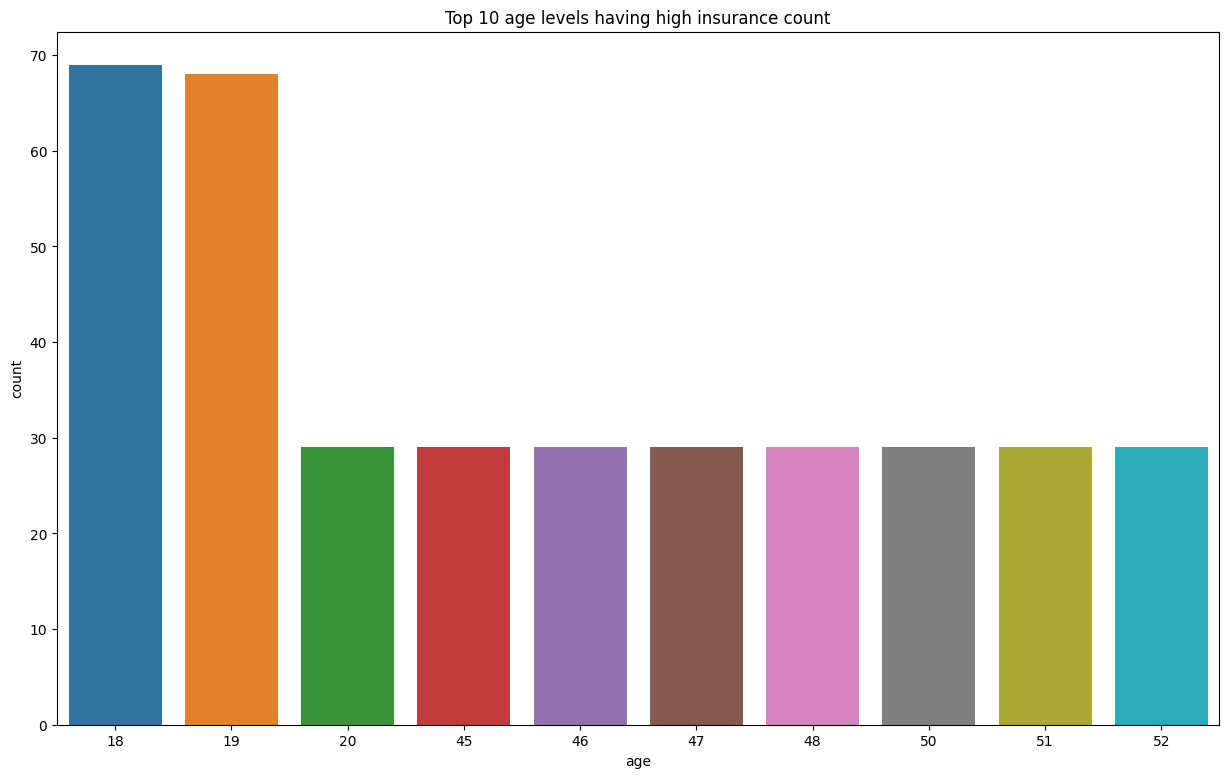

In [9]:
top10_age = d.nlargest(columns='count', n=10)
plt.figure(figsize=(15,9))
plt.title("Top 10 age levels having high insurance count")
sns.barplot(data=top10_age, x='age', y='count')
plt.show()

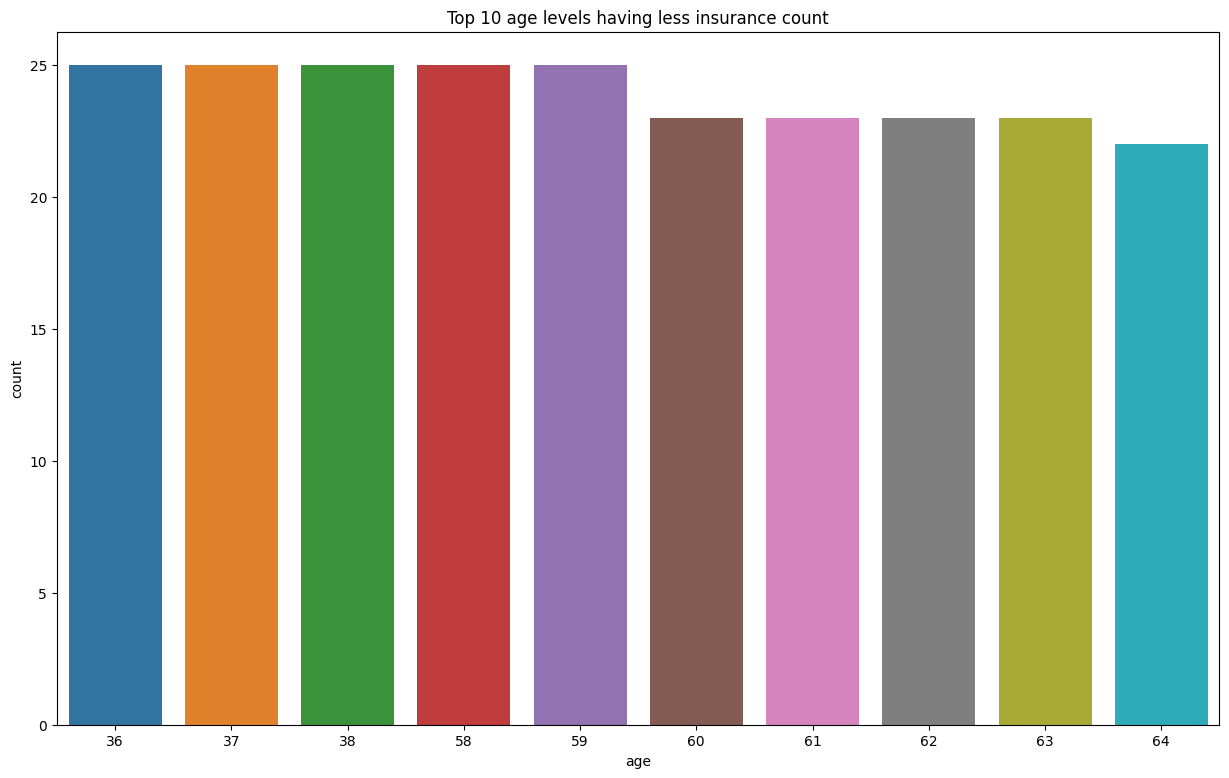

In [10]:
top10_age_small = d.nsmallest(columns='count', n=10)
plt.figure(figsize=(15,9))
plt.title("Top 10 age levels having less insurance count")
sns.barplot(data=top10_age_small, x='age', y='count')
plt.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
# calculating the % of appointments or not 
100*df['sex'].value_counts()/len(df['sex'])

male      50.523169
female    49.476831
Name: sex, dtype: float64

## univariate analysis

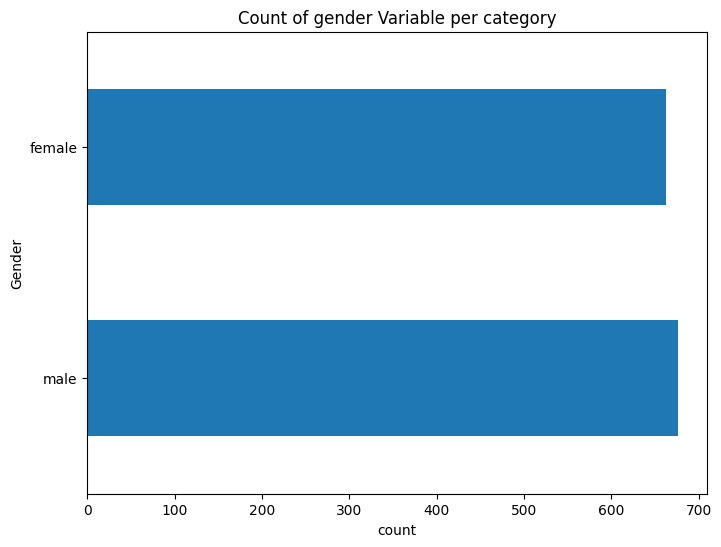

In [13]:
df['sex'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("Gender")
plt.title("Count of gender Variable per category");

In [14]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
# calculating the % of appointments or not 
100*df['smoker'].value_counts()/len(df['smoker'])

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

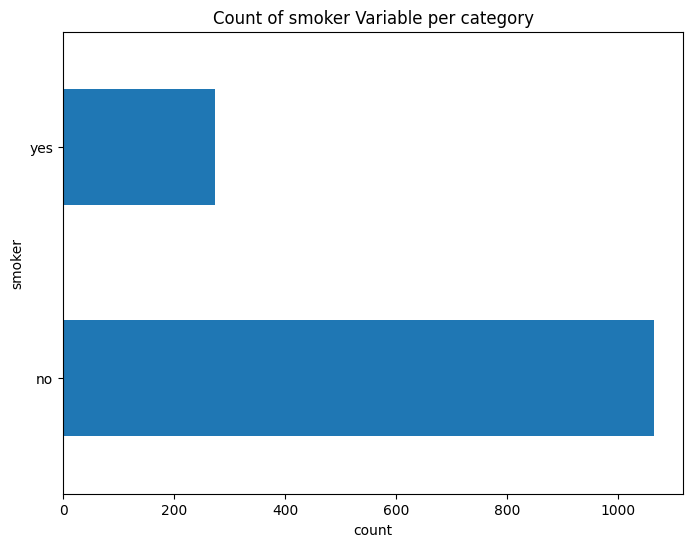

In [16]:
df['smoker'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("smoker")
plt.title("Count of smoker Variable per category");

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
# calculating the % of appointments or not 
100*df['region'].value_counts()/len(df['region'])

southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64

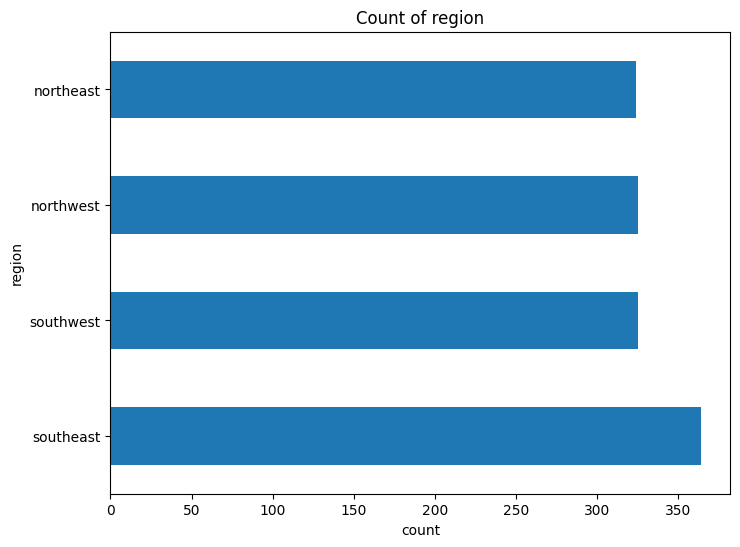

In [19]:
df['region'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("region")
plt.title("Count of region");

# bivariate analysis

In [53]:
fig = px.pie(top10_age,values='count', names='age', title='Population of top 10 age groups')
fig.show()

### Findings

##### 1. The count of people is higher for age group between 18 - 52.

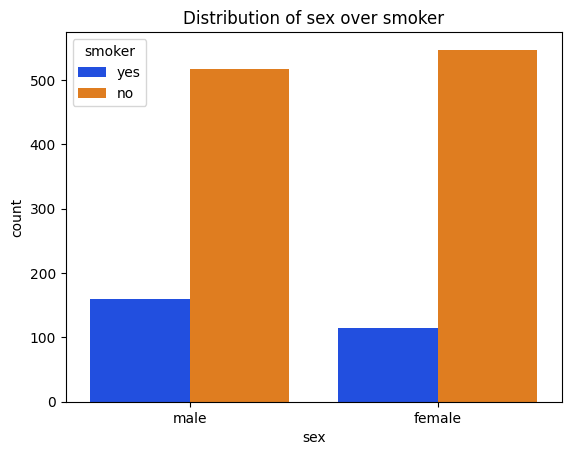

In [20]:
plt.title('Distribution of sex over smoker')
ax = sns.countplot(data = df, x="sex", order=df["sex"].value_counts().index,hue = "smoker",palette='bright') 
plt.show()

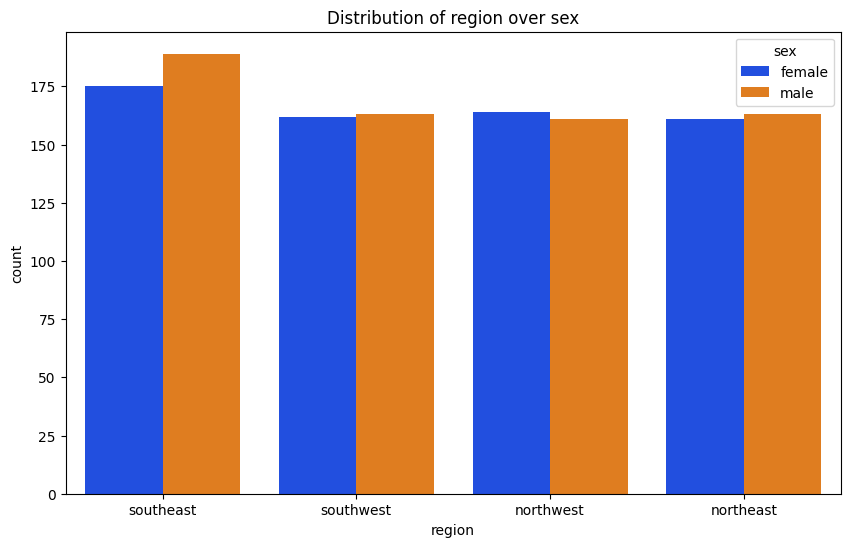

In [21]:
plt.figure(figsize=(10,6))
plt.title('Distribution of region over sex')
ax = sns.countplot(data = df, x="region", order=df["region"].value_counts().index,hue = "sex",palette='bright') 

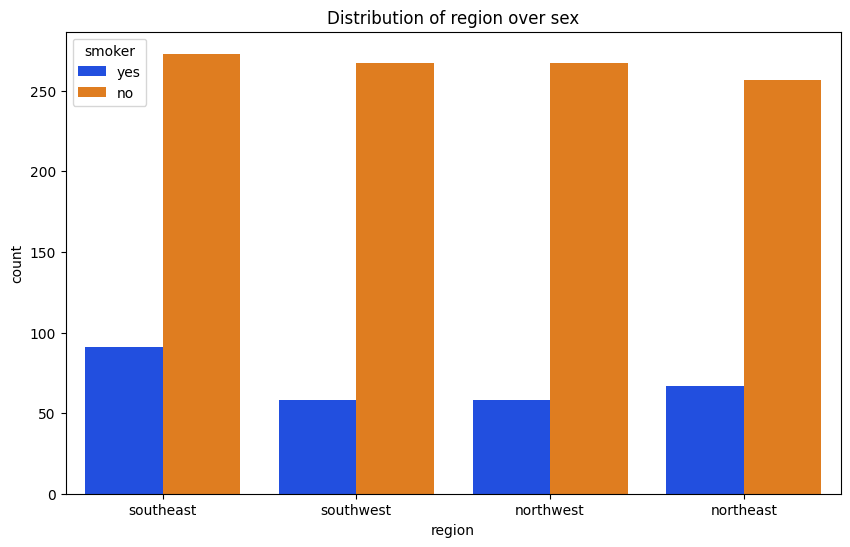

In [22]:
plt.figure(figsize=(10,6))
plt.title('Distribution of region over sex')
ax = sns.countplot(data = df, x="region", order=df["region"].value_counts().index,hue = "smoker",palette='bright') 

## Insights of univariate analysis

#### 1. The percentage of male count is 50.5% and females are 49.4% almost equal.
#### 2. The percentage of non smoker is 79.5% and smoker is 20.4%  the count of non smoker if higher than smoker.
#### 3. The south_east region has the highest count of 27.2% and the other 3 regions has 24.2% equally.

## Insights of bivariate analysis

#### 1. The count of female in non smoking and smoking category is higher than the male count .
#### 2. The south_east region has high number of  male counts than female counts among all regions.
#### 3. But in the remaining regions both male and females are almost equal.
#### 4. The south_east region has high number of  smokers than comparing other regions.
#### 5. The number of non smokers is almost same in all the regions.

# label encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()

In [24]:
df["sex"]=le1.fit_transform(df["sex"])

In [25]:
df["smoker"]=le2.fit_transform(df["smoker"])

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [27]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,northwest,10600.5483
1334,18,0,31.92,0,0,northeast,2205.9808
1335,18,0,36.85,0,0,southeast,1629.8335
1336,21,0,25.80,0,0,southwest,2007.9450
1337,61,0,29.07,0,1,northwest,29141.3603


In [28]:
df.shape

(1338, 7)

# one hot encoding encoding using pandas dummies

In [29]:
dummies=pd.get_dummies(df["region"],drop_first=True,prefix="region")

In [30]:
dummies

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


## concatenating two tables

In [31]:
df1=pd.concat([df,dummies],axis=1)

In [32]:
df1

,age,sex,bmi,children,smoker,region,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,1


In [33]:
df1.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [34]:
df1=df1.drop(["region"],axis=1)

In [35]:
df1

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


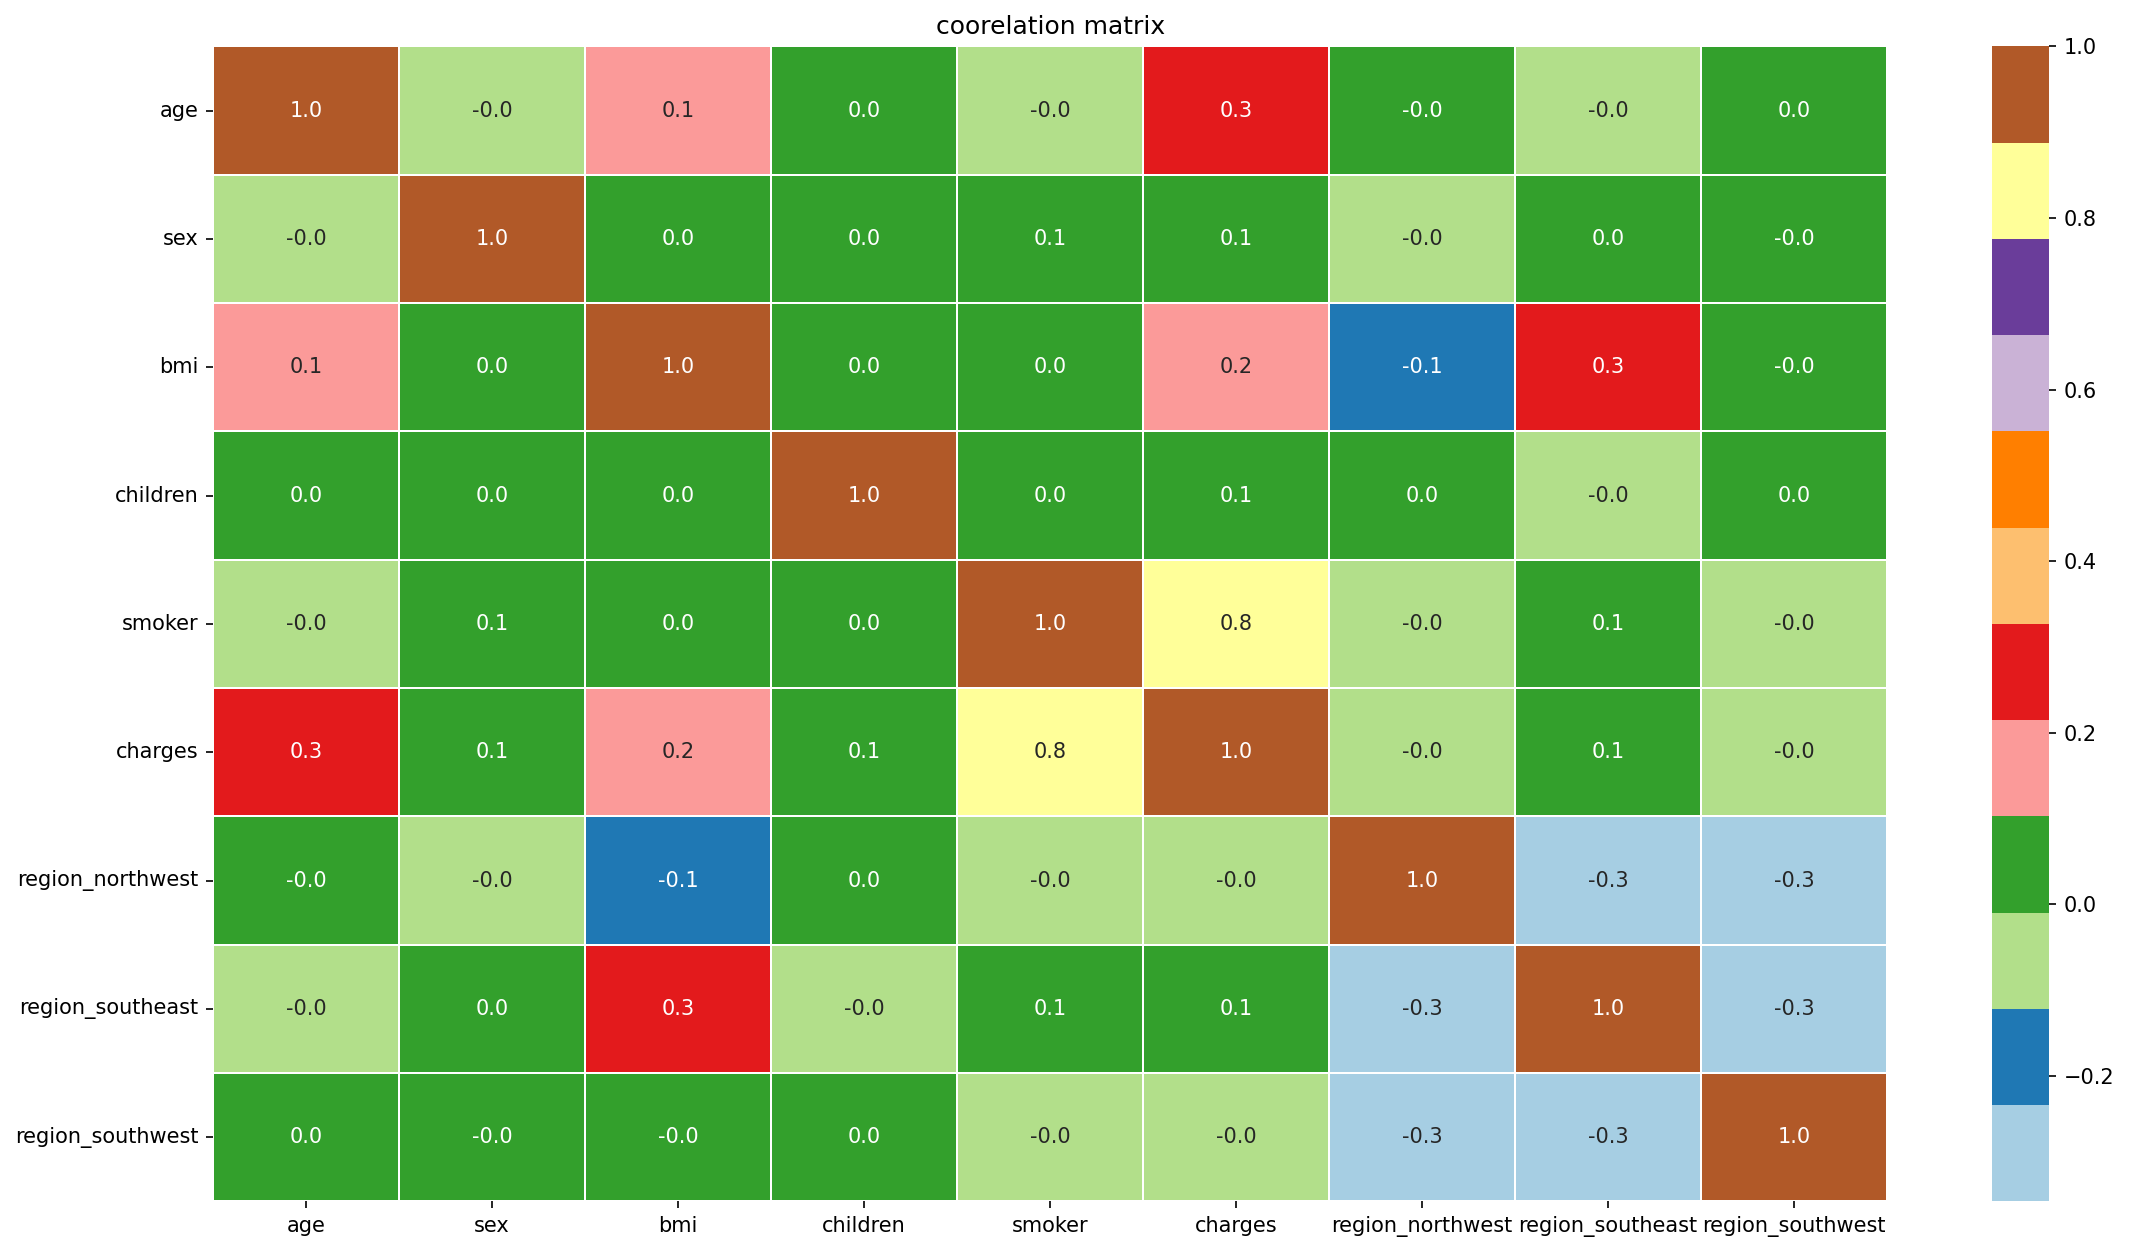

In [36]:
plt.figure(figsize=(18,10), dpi=150)
plt.title('coorelation matrix')
sns.heatmap(df1.corr(method='pearson'), annot=True, fmt='.1f', linewidth=0.2, cmap="Paired");

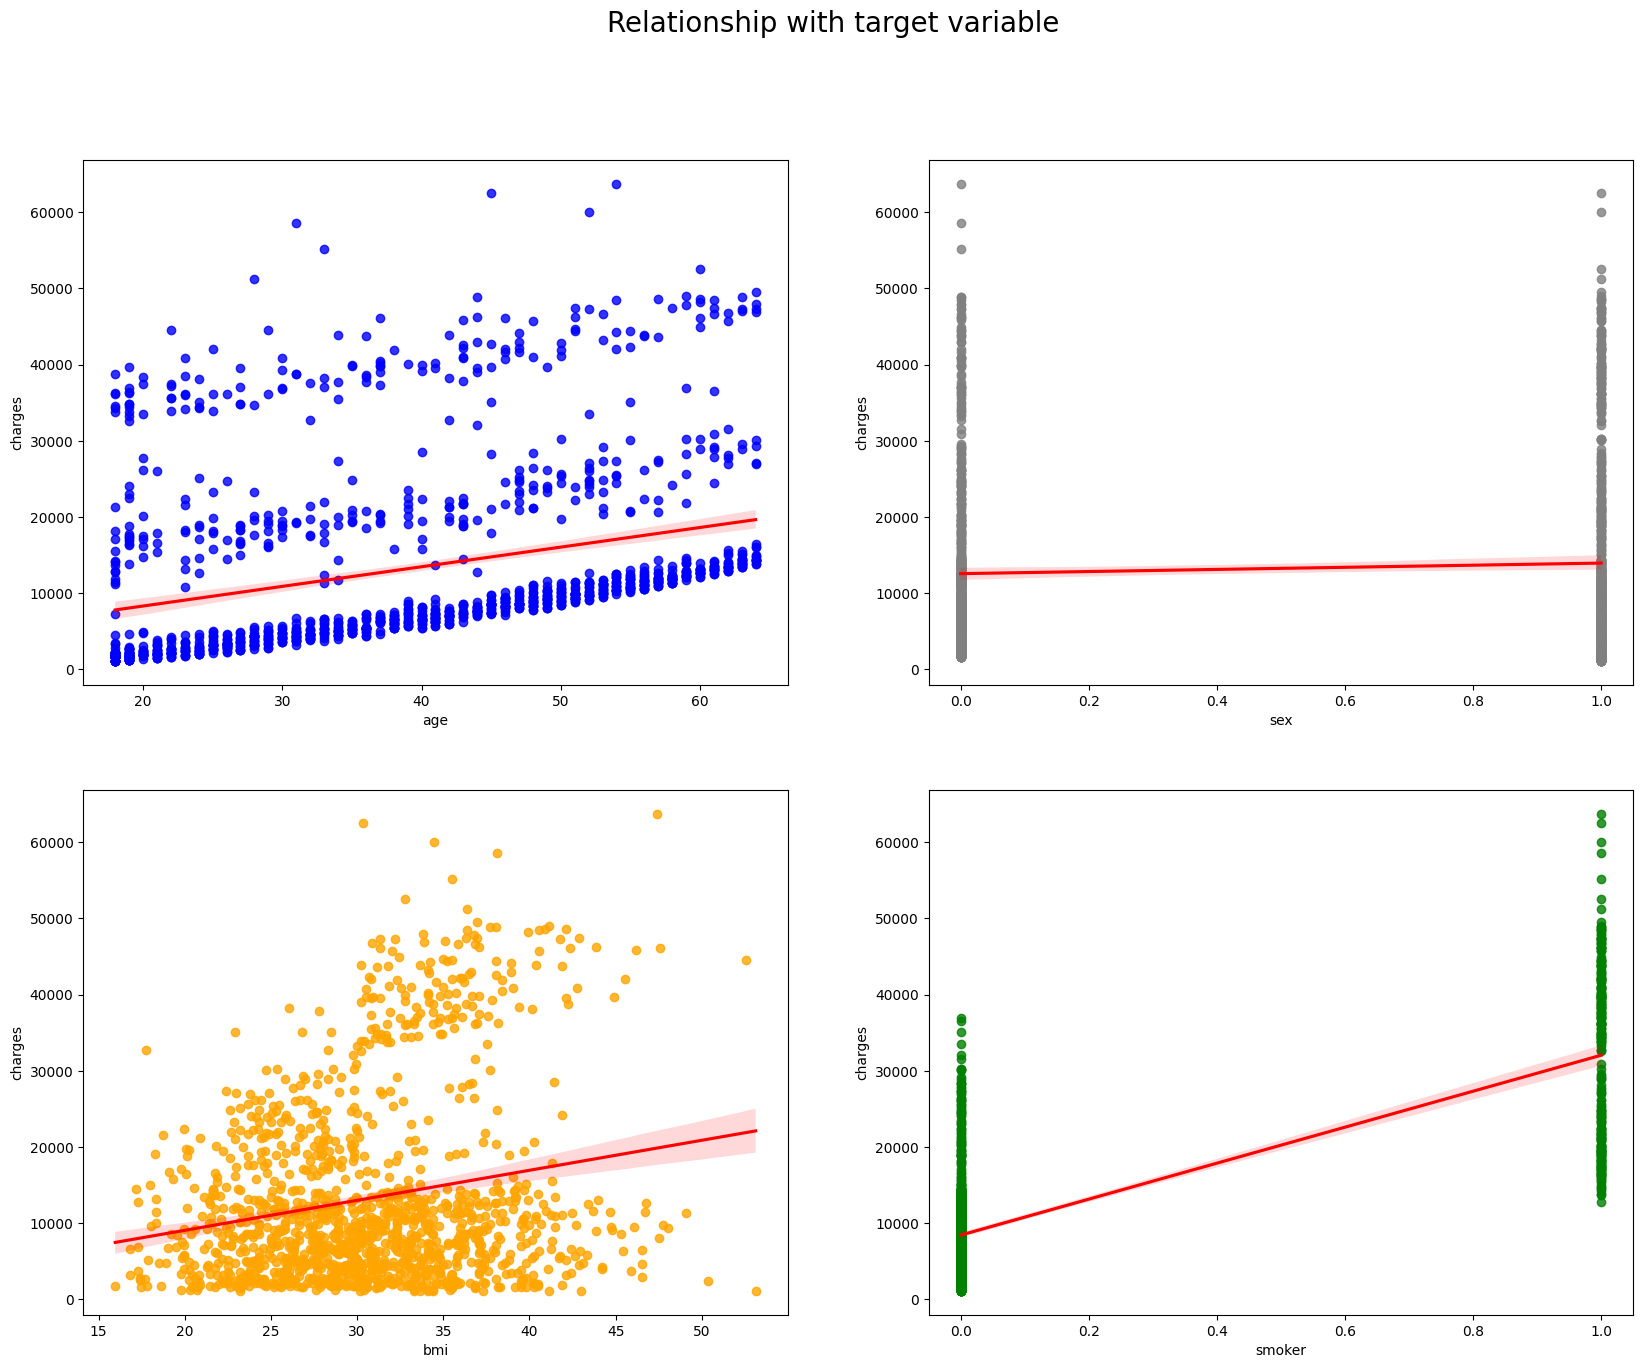

In [37]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.regplot(df1.age, df1.charges, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(df1.sex, df1.charges, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(df1.bmi, df1.charges, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(df1.smoker, df1.charges, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.suptitle("Relationship with target variable",fontsize=20)
plt.show()

## Findings

#### 1. By seeing the above coorelation plot the we can clearly say that only smoker variable 
####       has some good amount of linear relationship with the target.

#### 2. age and bmi also has some amount relationship with the target 

#### 3. sex has no relationship with target variable


In [38]:
df_copy=df1.copy()

# splitting dependent and independent variables for training

In [39]:
x=df1.drop("charges",axis=1)
y=df1["charges"]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x_train

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
560,46,0,19.950,2,0,1,0,0
1285,47,0,24.320,0,0,0,0,0
1142,52,0,24.860,0,0,0,1,0
969,39,0,34.320,5,0,0,1,0
486,54,0,21.470,3,0,1,0,0
...,...,...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0,0,0
1130,39,0,23.870,5,0,0,1,0
1294,58,1,25.175,0,0,0,0,0
860,37,0,47.600,2,1,0,0,1


In [42]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

# model training

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [44]:
model = LinearRegression()
model.fit(x_train, y_train)
pred= model.predict(x_test)
print('R2- SCORE:',r2_score(y_test,pred))

R2- SCORE: 0.7835929767120724


In [45]:
from sklearn.ensemble import RandomForestRegressor


In [46]:
rf=RandomForestRegressor(max_depth=5,n_estimators=95,random_state=42,)
rf.fit(x_train, y_train);
pred_rf = rf.predict(x_test)
print('R2- SCORE :', r2_score(y_test,pred_rf))

R2- SCORE : 0.8732954878181705


In [57]:
# saving the model
pickle.dump(rf,open("insurance.sav","wb"))